# Lab 1 Report

Hsuan-Chung Hung, Scott Lin, Charles Tung Fang

In [36]:
# We'll refer to this as the "import cell." Every module you import should be imported here.
%matplotlib notebook
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import simpleaudio as sa
# import whatever other modules you use in this lab

# The commands you use to make your modules usable also go in this cell.

## Summary

This lab is an introduction to Python and Signals by learning to use variables, performing basic operations and writing scripts to run in Jupyter Notebook. There are 5 assignments done in this lab: Creating and Manipulating Arrays, Amplitude Operations on Signals, Working with Sound Files, Plotting Comparisons, Plotting Sound Files using Subplots.

## Assignment 1 -- Creating and Manipulating Arrays 

In [37]:
# Assignment 1 - Creating and Manipulating Arrays

# Part A
y1 = np.array([4, 6, 2])

# Part B
ca = y1[1]
cb = y1[1 : 3]
d = len(y1)
print(ca, cb, d)

# Part C
x1 = np.ones(5) * 2
x2 = np.arange(5) - 2
print(x1, x2)

# Part D
arrp = x1 + x2
arrc = np.concatenate([x1, x2])
print(arrp, arrc)

6 [6 2] 3
[2. 2. 2. 2. 2.] [-2 -1  0  1  2]
[0. 1. 2. 3. 4.] [ 2.  2.  2.  2.  2. -2. -1.  0.  1.  2.]


###  Discussion

Addition doesn't change the length of the array and needs arrays to have the same length and adds the value of each element. Concatenation combine arrays to a single array. The length of the new array will be the total of all arrays. Those arrays don't have to be the same length.


## Assignment 2 -- Amplitude Operations on Signals 

In [38]:
# Assignment 2 - Amplitude Operations on Signals

# Part A
t = np.arange(0, 3.1, 0.5)
x = 0.5 * t
y = t ** 2

# Part B
z = x - 2 * y

# Part C
fs = 2
nstart = int(0 * fs)
n = int(2 * fs)
w1 = z[n - nstart]
print(w1)

# Part D
n1 = int(0 * fs)
n2 = int(1.5 * fs)
w2 = z[n1 - nstart : n2 - nstart+1]
print(w2)

-7.0
[ 0.   -0.25 -1.5  -3.75]


###  Discussion

fs decreases, the step size of time sample vector will increase, then the length of time sample vector will decrease. In the previous assignment, the length of x, y, z, and w2 will shorter, but w1 will be the same. Also, w2 will only contain 0 and -1.5.

## Assignment 3 -- Working with Sound Files

In [39]:
# Assignment 3 -- Working with Sound Files

# Part A
# use scipy.io to read audio files
from scipy.io import wavfile as wav
fs1, y1 = wav.read('train32.wav')
fs2, y2 = wav.read('tuba11.wav')
ch1 = len(y1.shape)
len2, ch2 = y2.shape
print(ch1, ch2)

# Part B
wav_obj1 = sa.WaveObject.from_wave_file('train32.wav')
wav_obj2 = sa.WaveObject.from_wave_file('tuba11.wav')
#play_obj1 = wav_obj1.play()
#play_obj1.wait_done()
#play_obj2 = wav_obj2.play()
#play_obj2.wait_done()
#play_obj3 = sa.play_buffer(y1, ch1, 2, fs2)
#play_obj3.wait_done()
#play_obj4 = sa.play_buffer(y2, ch2, 2, fs1)
#play_obj4.wait_done()

# Part C
y2 = y2[:, 0]
data1 = len(y1)
data2 = len(y2)
if data1 > data2:
    y3 = y1[0 : data2]
    y4 = 0.5 * y3 + 0.5 * y2
    y4 = np.int16(y4)
else:
    y3 = y2[0 : data1]
    y4 = 0.5 * y3 + 0.5 * y1
    y4 = np.int16(y4)
play_obj = sa.play_buffer(y4, ch1, 2, fs1)
play_obj.wait_done()
outfile = 'y4.wav'
wav.write(outfile,fs1,y4.astype('int16'))

# Part D
pause = np.zeros(int(4 * fs1), dtype = np.int16)
y5 = np.concatenate([y1, pause, y2])
play_obj = sa.play_buffer(y5, ch1, 2, fs1)
play_obj.wait_done()
outfile = 'y5.wav'
wav.write(outfile,fs1,y5.astype('int16'))

1 2


### Discussion

If fs increase, speed is faster and pitch is higher, fs decrease, speed is slower and pitch is lower. Because the tuba sound is stereo, we need to extract it to 1 channel to add or concatenate those two sounds.

## Assignment 4 -- Plotting Comparisons

<IPython.core.display.Javascript object>


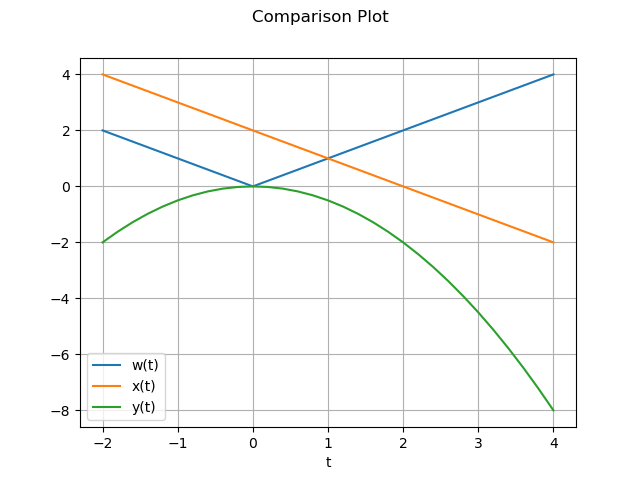

In [40]:
# Assignment 4

# Part A
t = np.arange(-2, 4.1, 0.2)
w = abs(t)
x = 2 - t
y = -0.5 * t ** 2

# Part B
fig1 = plt.figure(1)

plt.plot(t, w, label = 'w(t)')
plt.plot(t, x, label = 'x(t)')
plt.plot(t, y, label = 'y(t)')
plt.xlabel('t')
plt.suptitle("Comparison Plot")
plt.legend()
plt.grid()
plt.show()

### Discussion

We can change the line style to of w(t) and x(t) to make the figure easire to read by adding in the plt code. For example, plt.plot(t, w, label = 'w(t)', linestyle = 'dashed') and plt.plot(t, x, label = 'x(t)', linestyle = 'dotted'). We can change the linestyle to dashed or dotted.

## Assignment 5 -- Plotting Sound Files using Subplots


<IPython.core.display.Javascript object>


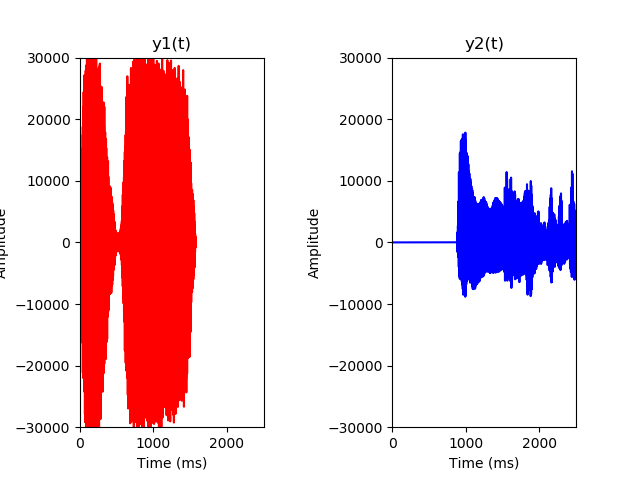

In [41]:
# Assignment 5 -- Plotting Sound Files using Subplots

# Part A
from scipy.io import wavfile as wav
fs1, y1 = wav.read('train32.wav')
fs2, y2 = wav.read('tuba11.wav')
y2 = y2[:, 0]
t1 = np.arange(0, len(y1), 1)
t1 = t1 / fs1 * 1000
t2 = np.arange(0, len(y2), 1)
t2 = t2 / fs2 * 1000

# Part B
fig2 = plt.figure(2)
fig2.subplots_adjust(hspace = 0.5, wspace = 0.7)

plt.subplot(1, 2, 1)
plt.plot(t1, y1, color = 'r')
plt.ylabel('Amplitude')
plt.xlabel('Time (ms)')
plt.title('y1(t)')
plt.xlim(0, 2500)
plt.ylim(-30000, 30000)

plt.subplot(1, 2, 2)
plt.plot(t2, y2, color = 'b')
plt.ylabel('Amplitude')
plt.xlabel('Time (ms)')
plt.title('y2(t)')
plt.xlim(0, 2500)
plt.ylim(-30000, 30000)
plt.show()

### Discussion

They have different shape, length and amplitude. No, we can not see the difference in sampling rate in these plots.